# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [580]:
import re
import json
import numpy as np
import pandas as pd
import requests
import seaborn as se
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

np.random.seed(42)

In [581]:
df_twitter = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [582]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code

200

In [583]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [584]:
df_image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')

In [585]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [586]:
df_image_predictions.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [587]:
!pip install -U tweepy==4.0

Requirement already up-to-date: tweepy==4.0 in /opt/conda/lib/python3.6/site-packages (4.0.0)


In [588]:
import tweepy

consumer_key = "*************" # put here your API Key
consumer_secret ="************" # put here your API Key Secret
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)




In [589]:
api

In [590]:
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

2356

In [591]:
%%time

import json

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            print("Success")
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
        

print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [592]:
df_json = pd.read_json("tweet-json.txt", lines=True, encoding='utf-8')
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statu..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/89217742130634342

In [593]:
df_json = df_json[['id','favorite_count','retweet_count']]

In [594]:
df_json.columns = ['tweet_id','favorite_count','retweet_count']

In [595]:
df_json.shape

(2354, 3)

In [596]:
df_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [597]:
df_full = df_twitter.merge(df_image_predictions, how='left', on='tweet_id').merge(df_json, how='left', on='tweet_id')

In [598]:
df_full.shape

(2356, 30)

In [599]:
df_full.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [600]:
df_full.to_csv('df_full.csv', index=False)

In [601]:
df = pd.read_csv('df_full.csv')
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11673.0,4858.0
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305783398402/photo/1,11,10,Carper,None,None,None,None,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1.0,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True,2669.0,542.0
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228088049664/photo/1,11,10,Banjo,None,None,pupper,None,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1.0,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True,2878.0,1118.0
611,797165961484890113,7.971238e+17,29166305.0,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@JODYHiGHROLLER it may be an 11/10 but what do I know 😉,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,32.0
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,20.0
1927,674051556661161984,NaN,NaN,2015-12-08 02:23:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She knits. Specializes in toboggans. 10/10 I'd buy a toboggan from Lucy https://t.co/YE2XDHy4Yk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674051556661161984/photo/1,10,10,Lucy,None,None,None,None,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1.0,Shih-Tzu,0.179777,True,badger,0.160580,False,three-toed_sloth,0.132154,False,1564.0,530.0
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1",12,10,Louis,None,None,None,None,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2.0,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False,10180.0,5035.0
1694,681281657291280384,NaN,NaN,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sarge. His parents signed him up for dancing lessons but his true passion is roller coasters 11/10 very petable https://t.co/KvVoBIgkje,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681281657291280384/photo/1,11,10,Sarge,None,None,Non

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Tidiness issues
1. we dont need all the columns pX.pX_conf, pX_dog, we will create a "breed" column and put there the highest assesment

2. we can arrange all doggo, floofer, pupper and puppo on one categoy column. 

### Quality issues
1. the timestamp is object - it should be datetime.

2. not all tweets about dogs.

3. there are urls inside the text, which are directing to the same tweets like the expanded_urls

4. Delete columns that won't be used for analysis - no need for retweets

5. there are 546 none values in column "name" and also 55 "a" names which is incorrect.

6. retweet and favorite count are float datatype & the source are object datatype and not a category.

7. the source column is with 3 values , aranged as html code.

8. For dog ratings, there are some observations with decimal ratings.

9. The ID fields tweet_id, in_reply_to_status_id etc. should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

- the process that helped me find these data issues above is with the help of Pandas functions like .info(), .head(), duplicated().

In [602]:
# Make copies of original pieces of data
copy_df = df_full.copy()

In [603]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

- we can see that we have the retweets, and we also have some rows without images

In [604]:
copy_df = copy_df[(copy_df['retweeted_status_id'].isna())&(copy_df['jpg_url'].notna())]

In [605]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

- checking for duplicated rows

In [606]:
copy_df.duplicated().sum()

0

In [607]:
copy_df.duplicated(subset='tweet_id').sum()

0

- checking the name column

In [608]:
copy_df['name'].value_counts()

None         546
a             55
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
the            7
Toby           7
Koda           6
Jax            6
an             6
Stanley        6
Bella          6
Bo             6
Oscar          5
Bailey         5
Buddy          5
Dave           5
Rusty          5
Louis          5
Chester        5
Milo           5
Scout          5
Leo            5
            ... 
Marty          1
Canela         1
Taco           1
Kollin         1
Donny          1
Glacier        1
Aja            1
Snickers       1
Roscoe         1
Kellogg        1
Bookstore      1
Reptar         1
Florence       1
Akumi          1
Dixie          1
Poppy          1
Fwed           1
Freddery       1
Andru          1
Jimbo          1
Spencer        1
Schnozz        1
Amélie         1
Edmund         1
Crouton        1
River          1
Terrance       1
Moreton       

-we can see that there is a problem with the names "a" and "none"

In [609]:
copy_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

the source column is with 3 values aranged as html code.

In [610]:
#lowercase the df.
copy_df = copy_df.applymap(lambda s:s.lower() if type(s) == str else s)

### Issue #1&2:

#### Define:
- the timestamp is object - it should be datetime.
- retweet and favorite count are float datatype.
- The ID fields tweet_id, in_reply_to_status_id etc. should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.


#### Code

In [611]:
copy_df['timestamp'] = pd.to_datetime(copy_df['timestamp'])

In [612]:
copy_df[['favorite_count','retweet_count']]= copy_df[['favorite_count','retweet_count']].fillna(value=0)

In [613]:
copy_df['favorite_count'] = copy_df['favorite_count'].astype('int')

In [614]:
copy_df['retweet_count'] = copy_df['retweet_count'].astype('int')

In [615]:
copy_df['tweet_id'] = copy_df['tweet_id'].astype('object')

In [616]:
copy_df['in_reply_to_status_id'] = copy_df['in_reply_to_status_id'].astype('object')

In [617]:
copy_df['in_reply_to_user_id'] = copy_df['in_reply_to_user_id'].astype('object')

#### Test

In [618]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       

### Issue #3&4:

#### Define
- the source column is with 3 values , arranged as html code.

- the source are object datatype and not a category.


#### Code

In [619]:
def clean_source(val):
    values = ['web','iphone', 'tweetdeck']
    return values[list(copy_df['source'].unique()).index(val)]
copy_df['source'] = copy_df['source'].apply(clean_source)
copy_df['source'] = copy_df['source'].astype('category')

#### Test

In [620]:
copy_df['source'].dtype

CategoricalDtype(categories=['iphone', 'tweetdeck', 'web'], ordered=False)

### Issue #5&6:


#### Define
- there is url inside text.
- there are 546 none values in column "name" and also 55 "a" names which is incorrect.



#### Code

In [621]:
copy_df['text'] = copy_df['text'].str.lower()

In [622]:
def remove_url(text):
    i =re.sub(r'https.*$',"", text)
    return i

copy_df['text'] = copy_df['text'].apply(remove_url)

In [623]:
def extract_names(text):
    i = re.findall(r'^this is.*?\.', text)
    if i:
        return i[0][:-1].split()[-1]
    
copy_df['new_names']=copy_df['text'].apply(extract_names)

In [624]:
def fix_names(row):
    if row['name']=='none' or row['name']=='a' or row['name']=='the':
        return row['new_names']
    return row['name']

copy_df['name'] = copy_df.apply(fix_names, axis=1)

#### Test


In [625]:
copy_df['name'].value_counts()

charlie      11
cooper       10
oliver       10
lucy         10
penny         9
tucker        9
sadie         8
winston       8
toby          7
lola          7
daisy         7
stanley       6
an            6
bo            6
jax           6
koda          6
bella         6
buddy         5
leo           5
chester       5
milo          5
rusty         5
dave          5
louis         5
bailey        5
oscar         5
scout         5
gus           4
finn          4
scooter       4
             ..
akumi         1
mo            1
maisey        1
mairi         1
terrance      1
river         1
vinnie        1
ralpher       1
cuddles       1
holly         1
julius        1
goose         1
skittles      1
arya          1
pepe          1
sherk         1
jennifur      1
ralphé        1
levi          1
rolf          1
derby         1
acro          1
rumble        1
lance         1
kulet         1
bookstore     1
scott         1
andy          1
rufio         1
jazz          1
Name: name, Length: 970,

In [626]:
copy_df.drop(columns='new_names', inplace=True)

In [627]:
copy_df['text'].sample(10)

325                                       this is bentley. hairbrushes are his favorite thing in the h*ckin world. 12/10 impawsible to say no to 
2027                                this is mia. she was specifically told not get on top of the hutch or play in the fridge. 10/10 what a rebel 
421                                                                                        this is jimison. he was just called a good boy. 13/10 
927                          this is winnie. she's not a fan of the fast moving air. 11/10 objects in mirror may be more fluffy than they appear 
1027                                                         this is arlen and thumpelina. they are best pals. cuddly af. 11/10 for both puppers 
2043                                  this is reginald. he's pondering what life would be like without so much damn skin. 9/10 it'll be ok buddy 
2284                                                                 *takes several long deep breaths* omg omg omg omg omg o

### Issue #7:


#### Define
- no need for retweets cause we dont analyze them.

#### code

In [628]:
copy_df = copy_df[copy_df.retweeted_status_id.isnull()]
copy_df = copy_df[copy_df.retweeted_status_user_id.isnull()]
copy_df = copy_df[copy_df.retweeted_status_timestamp.isnull()]

#### test

In [629]:
copy_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

### Issue #8:


#### Define
- not all tweets about dogs
- we dont need all columns (pX,px_conf, px_dog, we will create columns for breed.( if its a dog)


#### Code


In [630]:
def return_breed(row):
    conf = [row['p1_conf'], row['p2_conf'], row['p3_conf']]
    num_with_max_conf = conf.index(max(conf))
    if not row[f"p{num_with_max_conf+1}_dog"]:
        return None
    return row[f"p{num_with_max_conf+1}"]
copy_df['breed'] = copy_df.apply(return_breed, axis=1)

In [631]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null category
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1431 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                     

In [632]:
copy_df.dropna(subset=['breed'], inplace=True)

In [633]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 31 columns):
tweet_id                      1477 non-null object
in_reply_to_status_id         14 non-null object
in_reply_to_user_id           14 non-null object
timestamp                     1477 non-null datetime64[ns]
source                        1477 non-null category
text                          1477 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1477 non-null object
rating_numerator              1477 non-null int64
rating_denominator            1477 non-null int64
name                          1101 non-null object
doggo                         1477 non-null object
floofer                       1477 non-null object
pupper                        1477 non-null object
puppo                         1477 non-null object
jpg_url                     

In [634]:
copy_df.drop(columns=['p1','p1_conf', 'p1_dog','p2','p2_conf','p2_dog','p3','p3_conf', 'p3_dog'], inplace=True)

#### test


In [635]:
copy_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count,breed
1380,701214700881756160,NaN,NaN,2016-02-21 01:19:47,web,"i'm not sure what's happening here, but it's pretty spectacular. 12/10 for both",NaN,NaN,NaN,https://twitter.com/dog_rates/status/701214700881756160/photo/1,12,10,None,none,none,none,none,https://pbs.twimg.com/media/cbs3doaxiaap3bd.jpg,1.0,13475,5812,chihuahua
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42,web,say hello to maddie and gunner. they are considerably pupset about bath time. both 12/10 but gunner needs your help\n\n,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1",12,10,maddie,none,none,none,none,https://pbs.twimg.com/media/c6qgphpv4aekrdc.jpg,1.0,9761,1972,golden_retriever
2233,668204964695683073,NaN,NaN,2015-11-21 23:10:52,web,this is ron. ron's currently experiencing a brain freeze. damn it ron. 8/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668204964695683073/photo/1,8,10,ron,none,none,none,none,https://pbs.twimg.com/media/cuxw3qhwoaak8hj.jpg,1.0,586,206,labrador_retriever
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27,web,i have stumbled puppon a doggo painting party. they're looking to be the next pupcasso or puppollock. all 13/10 would put it on the fridge,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,none,none,none,https://pbs.twimg.com/media/c-s5oyzxkaamhhq.jpg,1.0,16304,3771,golden_retriever
2073,670995969505435648,NaN,NaN,2015-11-29 16:01:20,web,yea i can't handle this job anymore your dogs are too adorable. 12/10,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/670995969505435648/photo/1,https://twitter.com/dog_rates/status/670995969505435648/photo/1,https://twitter.com/dog_rates/status/670995969505435648/photo/1",12,10,None,none,none,none,none,https://pbs.twimg.com/media/cu_briewcaauvc7.jpg,1.0,1175,317,redbone
1758,678755239630127104,NaN,NaN,2015-12-21 01:53:54,web,this is dash. he didn't think the water would be that cold. damn it dash it's december. think a little. 10/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678755239630127104/photo/1,10,10,dash,none,none,none,none,https://pbs.twimg.com/media/cwtssqaukaanwws.jpg,1.0,7802,3741,malamute
1832,676191832485810177,NaN,NaN,2015-12-14 00:07:50,web,these two pups just met and have instantly bonded. spectacular scene. mesmerizing af. 10/10 and 7/10 for blue dog,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/676191832485810177/photo/1,https://twitter.com/dog_rates/status/676191832485810177/photo/1,https://twitter.com/dog_rates/status/676191832485810177/photo/1",10,10,None,none,none,none,none,https://pbs.twimg.com/media/cwjq4umwoaij29t.jpg,2.0,2478,1145,chihuahua
2064,671154572044468225,NaN,NaN,2015-11-30 02:31:34,web,meet holly. she's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572044468225/photo/1,11,10,holly,none,none,none,none,https://pbs.twimg.com/media/cvbrhxowiaaox_c.jpg,1.0,769,241,labrador_retriever
2207,668627278264475648,NaN,NaN,2015-11-23 03:09:00,web,this is timofy. he's a pilot for southwest. it's christmas morning &amp; everyone has gotten kickass gifts but him. 9/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668627278264475648/photo/1,9,10,timofy,none,none,none,none,https://pbs.twimg.com/media/cudw9thwsaa4mb9.jpg,1.0,341,123,french_bulldog
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00,web,we usually don't rate polar bears but this one seems extra good. majestic as h*ck. 13/10 would hug for a while,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/845812042753855489/photo/1,https://twitter.com/dog_rates/status/845812042753855489/photo/1,https://twitter.com/do

### Issue #9:


#### Define
- we can arrange all doggo, floofer, pupper and puppo on one categoy column.

#### Code


In [636]:
copy_df['dog_stage']=None
copy_df['dog_stage'] = copy_df.doggo + copy_df.floofer + copy_df.pupper + copy_df.puppo

In [637]:
copy_df['dog_stage'].value_counts()

nonenonenonenone        1249
nonenonepuppernone       144
doggononenonenone         48
nonenonenonepuppo         19
doggononepuppernone        8
nonefloofernonenone        7
doggononenonepuppo         1
doggofloofernonenone       1
Name: dog_stage, dtype: int64

In [638]:
copy_df['dog_stage'] = copy_df['dog_stage'].map(lambda x: x.replace("None",""))

In [639]:
copy_df['dog_stage'].value_counts()

nonenonenonenone        1249
nonenonepuppernone       144
doggononenonenone         48
nonenonenonepuppo         19
doggononepuppernone        8
nonefloofernonenone        7
doggononenonepuppo         1
doggofloofernonenone       1
Name: dog_stage, dtype: int64

In [640]:
copy_df.loc[copy_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
copy_df.loc[copy_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
copy_df.loc[copy_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [641]:
copy_df['dog_stage'].value_counts()

nonenonenonenone        1249
nonenonepuppernone       144
doggononenonenone         48
nonenonenonepuppo         19
doggononepuppernone        8
nonefloofernonenone        7
doggononenonepuppo         1
doggofloofernonenone       1
Name: dog_stage, dtype: int64

In [642]:
copy_df.drop(columns=['doggo', 'floofer', 'puppo','pupper'], inplace=True)

In [643]:
copy_df.head(10)



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,favorite_count,retweet_count,breed,dog_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,web,"this is tilly. she's just checking pup on you. hopes you're doing ok. if not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,tilly,https://pbs.twimg.com/media/dggmov4xsaaul6n.jpg,1.0,33819,6514,chihuahua,nonenonenonenone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,web,this is archie. he is a rare norwegian pouncing corgo. lives in the tall grass. you never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,archie,https://pbs.twimg.com/media/dgbdlu1wsaanxj9.jpg,1.0,25461,4328,chihuahua,nonenonenonenone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,web,"this is franklin. he would like you to stop calling him ""cute."" he is a very fierce shark and should be respected as such. 12/10 #barkweek",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,franklin,https://pbs.twimg.com/media/df6hr6bumaazzgt.jpg,2.0,41048,9774,basset,nonenonenonenone
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,web,here we have a majestic great white breaching off south africa's coast. absolutely h*ckin breathtaking. 13/10 (ig: tucker_marlo) #barkweek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,https://pbs.twimg.com/media/df3hwyewsaabqe6.jpg,1.0,20562,3261,chesapeake_bay_retriever,nonenonenonenone
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,web,meet jax. he enjoys ice cream so much he gets nervous around it. 13/10 help jax enjoy more things by clicking below\n\n,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,jax,https://pbs.twimg.com/media/df1eomzxuaalucq.jpg,1.0,12041,2158,appenzeller,nonenonenonenone
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,web,when you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,https://pbs.twimg.com/media/dfybahavwaahutd.jpg,2.0,56848,16716,pomeranian,nonenonenonenone
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,web,this is zoey. she doesn't want to be one of the scary sharks. just wants to be a snuggly pettable boatpet. 13/10 #barkweek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,zoey,https://pbs.twimg.com/media/dfwuu__xcaepyxi.jpg,1.0,28226,4429,irish_terrier,nonenonenonenone
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,web,this is cassie. she is a college pup. studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,cassie,https://pbs.twimg.com/media/dfreyvuw0aao3t9.jpg,1.0,32467,7711,pembroke,doggononenonenone
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,web,this is koda. he is a south australian deckshark. deceptively deadly. frighteningly majestic. 13/10 would risk a petting #barkweek,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,koda,https://pbs.twimg.com/media/dfnwsy4waaamlis.jpg,1.0,31166,7624,samoyed,nonenonenonenone
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,web,this is bruno. he is a service shark. only gets out of the water to assist you. 13/10 terrifyingly good boy,NaN,NaN,NaN,https://twitter.com/dog_rates/status/88988089647986

#### Test


In [644]:
copy_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,favorite_count,retweet_count,breed,dog_stage
390,826240494070030336,NaN,NaN,2017-01-31 01:27:39,web,we only rate dogs. please don't send in any more non-dogs like this wild albanian street moose. thank you... 11/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826240494070030336/photo/1,11,10,None,https://pbs.twimg.com/media/c3dlvmbxaaud-gh.jpg,1.0,14614,2965,french_bulldog,nonenonenonenone
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01,web,this is herald. he wants you to know he could steal your girl at any moment. 10/10,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/689280876073582592/photo/1,https://twitter.com/dog_rates/status/689280876073582592/photo/1,https://twitter.com/dog_rates/status/689280876073582592/photo/1,https://twitter.com/dog_rates/status/689280876073582592/photo/1",10,10,herald,https://pbs.twimg.com/media/czdrtapuoaeaqxf.jpg,3.0,2197,819,chihuahua,nonenonenonenone
1793,677331501395156992,NaN,NaN,2015-12-17 03:36:28,web,meet humphrey. he's a northern polyp viagra. one ear works. face stuck like that. always surprised. 9/10 petable af,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677331501395156992/photo/1,9,10,humphrey,https://pbs.twimg.com/media/cwzdagxxaaajgjb.jpg,1.0,1189,265,beagle,nonenonenonenone
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42,web,look at this jokester thinking seat belt laws don't apply to him. great tongue tho 10/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417576210432/photo/1,10,10,None,https://pbs.twimg.com/media/ct9vn7pwoaa_zcm.jpg,1.0,307,146,golden_retriever,nonenonenonenone
1422,698178924120031232,NaN,NaN,2016-02-12 16:16:41,web,this is lily. she accidentally dropped all her kohl's cash overboard. day officially ruined. 10/10 hang in there pup,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698178924120031232/photo/1,10,10,lily,https://pbs.twimg.com/media/cbbubhbwwaegh29.jpg,1.0,3084,830,chesapeake_bay_retriever,nonenonenonenone
2164,669371483794317312,NaN,NaN,2015-11-25 04:26:12,web,this is oliviér. he's a baptist hindquarter. also smooth af with the babes. 10/10 i'd totally get in a car with him,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669371483794317312/photo/1,10,10,oliviér,https://pbs.twimg.com/media/cuovz8ru8aafw-c.jpg,1.0,524,196,brabancon_griffon,nonenonenonenone
779,775842724423557120,NaN,NaN,2016-09-13 23:44:54,web,this is blue. he was having an average day until his owner told him about bront. 12/10 h*ckin hysterical af,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/775842724423557120/photo/1,https://twitter.com/dog_rates/status/775842724423557120/photo/1",12,10,blue,https://pbs.twimg.com/media/csry1jawyauox55.jpg,2.0,13022,3116,chow,nonenonenonenone
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54,web,we only rate dogs. please stop sending in non-canines like this alaskan flop turtle. this is very frustrating. 10/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175608430592/photo/1,10,10,very,https://pbs.twimg.com/media/cjey5dkxeaa3wkd.jpg,1.0,8901,3115,labrador_retriever,nonenonenonenone
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48,web,this is gabe. he is a southern baklava. gabe has always wanted to fit in with the other bananas. 10/10 fabulous,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796878725120/photo/1,10,10,gabe,https://pbs.twimg.com/media/cuiv6f7xiaa1tam.jpg,1.0,346,135,pembroke,nonenonenonenone
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01,web,this is arnie. he's a nova scotian fridge floof. rare af. 12/10,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/750429297815552001/photo/1,https://twitter.com/dog_rates/status/750429297815552001/photo/1",12,10,arnie,https://pbs.twimg.com/media/cmopdmhw8aai8bi.jpg,1.0,14569,4947,golden_retriever,nonenonenonenone


### Issue #10:

#### Define
- Correct numerators with decimals

In [645]:
copy_df[['rating_numerator', 'rating_denominator']] = copy_df[['rating_numerator','rating_denominator']].astype(float)

copy_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 19 columns):
tweet_id                      1477 non-null object
in_reply_to_status_id         14 non-null object
in_reply_to_user_id           14 non-null object
timestamp                     1477 non-null datetime64[ns]
source                        1477 non-null category
text                          1477 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1477 non-null object
rating_numerator              1477 non-null float64
rating_denominator            1477 non-null float64
name                          1101 non-null object
jpg_url                       1477 non-null object
img_num                       1477 non-null float64
favorite_count                1477 non-null int64
retweet_count                 1477 non-null int64
breed                    

### Code


In [646]:
copy_df.loc[(copy_df.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
copy_df.loc[(copy_df.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
copy_df.loc[(copy_df.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
copy_df.loc[(copy_df.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
copy_df.loc[(copy_df.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


### Test

In [647]:

copy_df[copy_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,"this is bella. she hopes her smile made you smile. if not, she is also offering you her favorite monkey. 13.5/10",13.50
695,"this is logan, the chow who lived. he solemnly swears he's up to lots of good. h*ckin magical af 9.75/10",9.75
763,this is sophie. she's a jubilant bush pupper. super h*ckin rare. appears at random just to smile at the locals. 11.27/10 would smile back,11.27
1712,here we have uncovered an entire battalion of holiday puppers. average of 11.26/10,11.26


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [648]:
copy_df.to_csv("twietter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

- what is the most popular breed

In [649]:
plt.tight_layout()

In [650]:
x =(copy_df['breed'].value_counts(normalize=True)*100).to_frame()[:10]

In [651]:
x.index

Index(['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua',
       'pug', 'chow', 'samoyed', 'toy_poodle', 'pomeranian', 'malamute'],
      dtype='object')

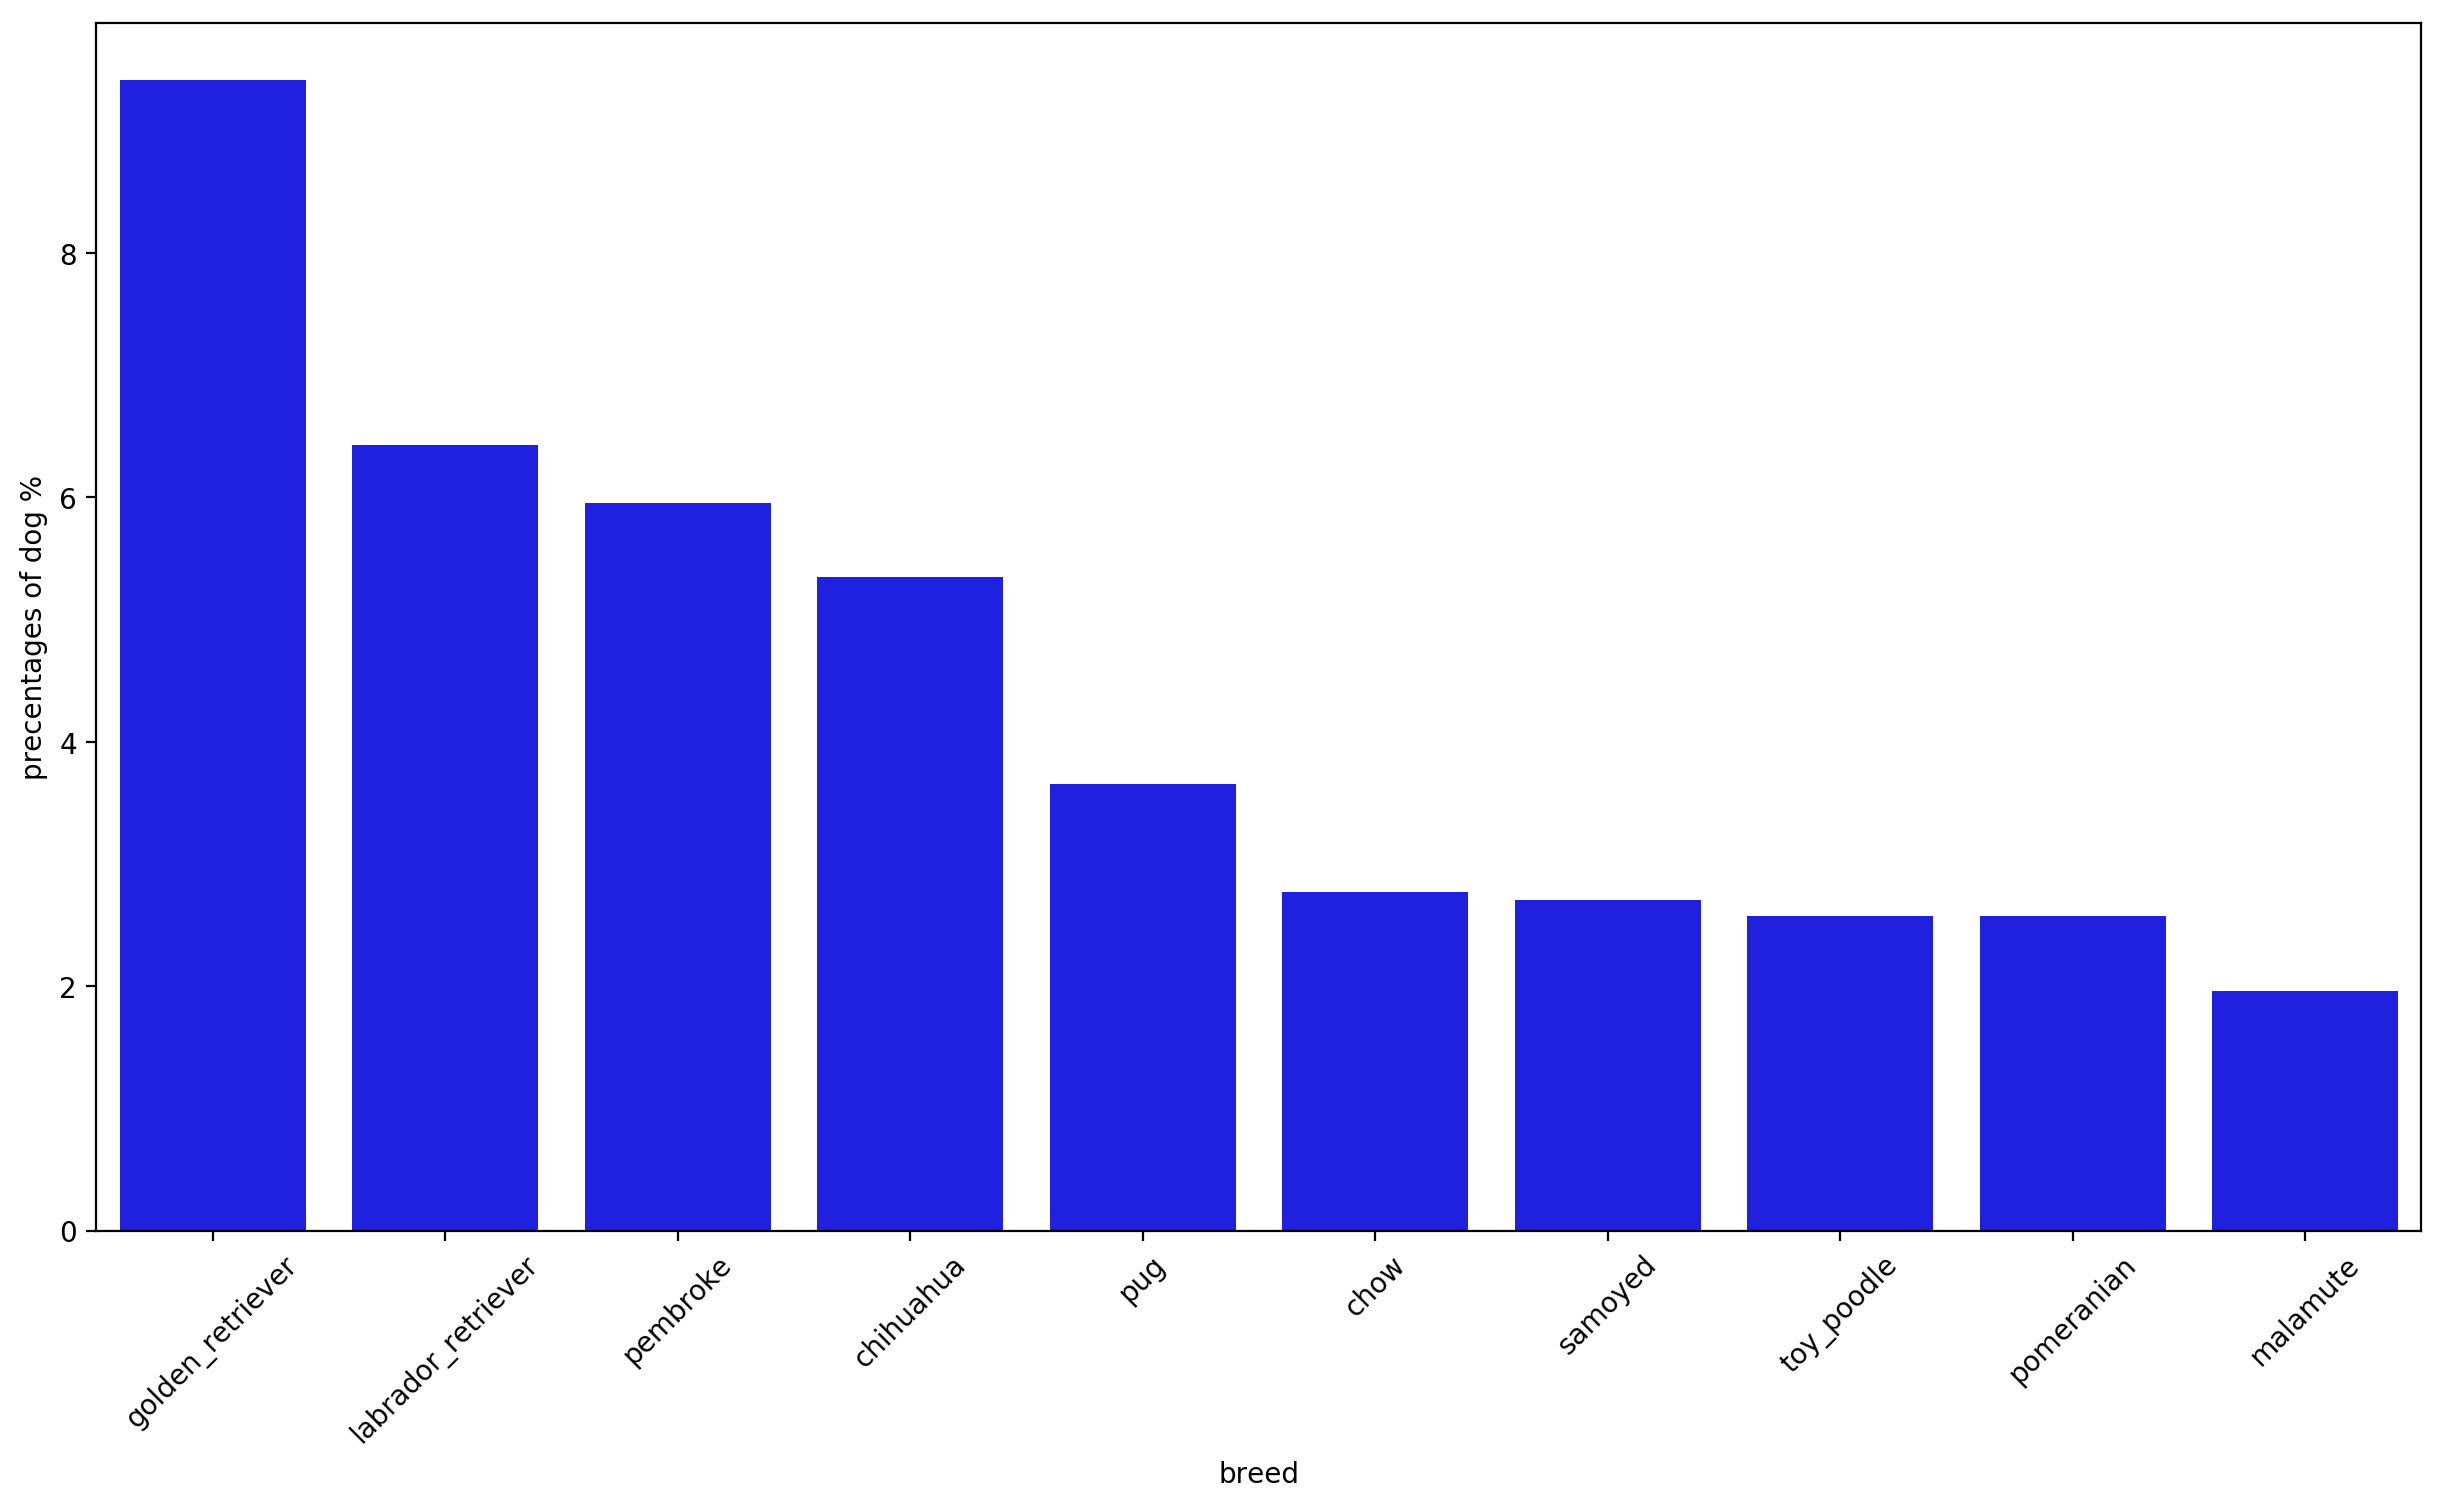

In [652]:
x = (copy_df['breed'].value_counts(normalize=True)*100).to_frame()[:10].reset_index()
x.columns = ['breed', 'precentages of dog %']
plt.figure(figsize=(15,8), dpi=200)
se.barplot(data = x , x = 'breed', y = 'precentages of dog %', color ='blue')
plt.xticks(rotation=45)
plt.savefig('breeds.png')

- what is the most popular dog names

In [653]:
x = copy_df['name'].value_counts().to_frame()[:10]
x.index

Index(['charlie', 'cooper', 'oliver', 'tucker', 'lucy', 'penny', 'daisy',
       'sadie', 'jax', 'koda'],
      dtype='object')

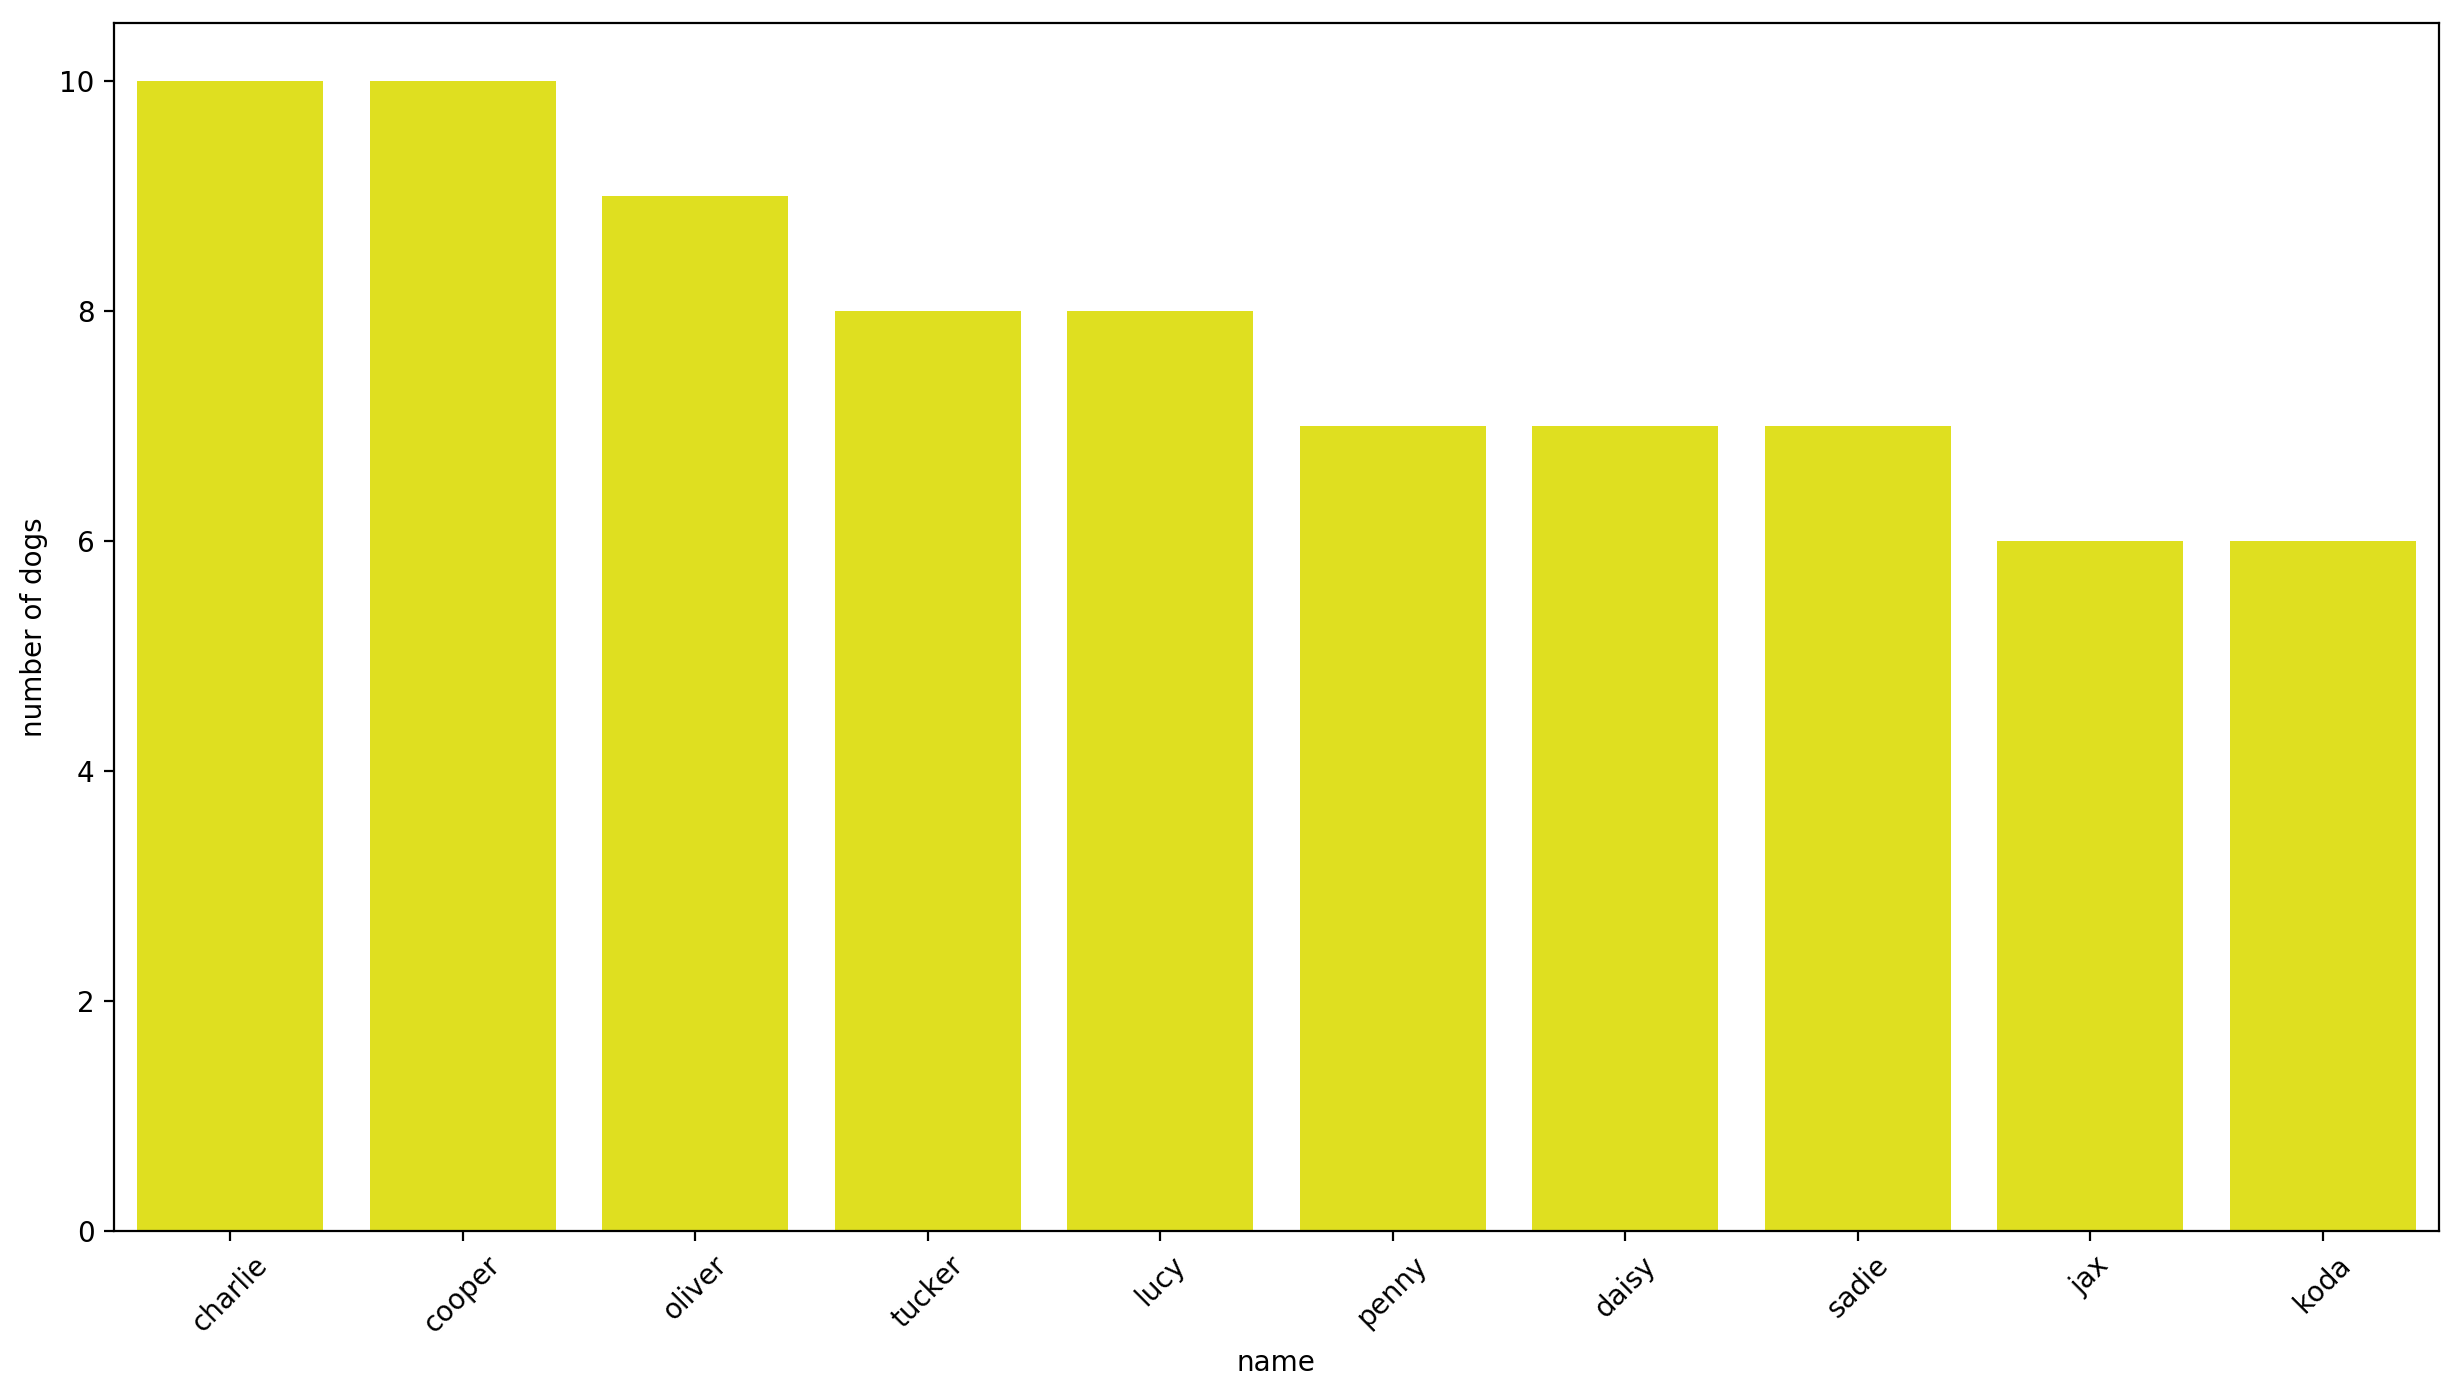

In [654]:
x = copy_df['name'].value_counts().to_frame()[:10].reset_index()
x.columns =['name', 'number of dogs']
plt.figure(figsize=(15,8), dpi=200)
se.barplot(data = x , x = 'name', y ='number of dogs', color ='yellow')
plt.xticks(rotation=45)
plt.savefig('names.png')

- Comparing retweets and favorites counts over time.

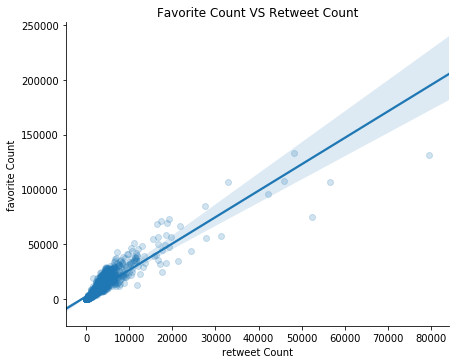

In [656]:
se.lmplot(x ="retweet_count", y ="favorite_count", data=copy_df, size = 5, aspect=1.3, scatter_kws={'alpha':1/5});

plt.title('Favorite Count VS Retweet Count');
plt.xlabel('retweet Count');
plt.ylabel('favorite Count');
plt.savefig('retweetsvsfavorites.png')


### Insights:
1.The most popular breed is golden retriver, in second place: lavrdor retriver.

2.The most popular dog names is Copper, charlie and oliver.

3.By Comparing retweets and favorites counts over time we can see that there is a positive correlation between favorite counts and retweet counts.